# Kaggle房价预测



>步骤:

>一.导入数据包与数据集

>二.数据分析
1. 总体预览:了解每列数据的含义,数据的格式等
2. 数据初步分析,使用统计学与绘图:初步了解数据之间的相关性,为构造特征工程以及模型建立做准备
>
三.特征工程
1. 根据业务,常识,以及第二步的数据分析构造特征工程.
2. 将特征转换为模型可以辨别的类型(如处理缺失值,处理文本进行等)
>
四.模型选择
1. 根据目标函数确定学习类型,是无监督学习还是监督学习,是分类问题还是回归问题等.
2. 比较各个模型的分数,然后取效果较好的模型作为基础模型.
>
五.修改特征和模型参数
1. 可以通过添加或者修改特征,提高模型的上限.
2. 通过修改模型的参数,是模型逼近上限
>
>
><a href=https://github.com/fengfengtzp>@风风</a>

## 一、导入数据包与数据集

In [5]:
#导入EDA使用的包
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#导入数据集
train = pd.read_csv('train.csv',index_col='Id')#训练集
test = pd.read_csv('test.csv',index_col='Id')#需要预测数据集
#查看数据集形状
print(train.shape,test.shape)

(1460, 80) (1459, 79)


## 二、数据分析

### 总体预览

对数据集有什么feature和feature分布有一个大致的了解

In [6]:
train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


从上面的数据集包含79个特征，特征中包含数值变量和分类变量，并且数据中有缺失值

### 理解数据集
通过创建一个Excel表格来管理特征，对每个特征进行多维度的描述，更好的理解特征。表格应包括：
+ 变量名：变量名称
+ 变量类型：此列应只有两种可能的值“数值”“分类”。“数值”意味着数值型变量，如“LotArea”，“分类”意味着类别的变量,如“LotConfig”
+ 方面：特征是属于哪个方面。如房子的空间、房子的地理位置...对特征本身的抽象，将特征归为某一方面
+ 期望：主观上对于特征重要性（对预测目标的影响）的预期
+ 结论：经过分析后，客观上对预测目标的影响
+ 其他

虽然对特征的主观不太准确，但通过完善该列，增强了对数据的理解，需要对每个特征进行一次评估，评估从以下三个方面展开：
+ 自己买房子时是否会考虑这个变量？（如墙面的瓷砖类型是否影响你做出购买决定）
+ 如果会考虑，影响力有多大？(墙面使用普通材质和高级材质影响有多大）
+ 这些信息是否在其他变量中描述过（例如，如果'LandContour'给出了房产的平整度，我们是否真的需要知道'LandSlope'？）

通过以上分析后，将实际相关性填入结论列


In [7]:
featureExp = pd.read_excel('./HousePriceFeature.xlsx',index_col='Name')#读取根据上述操作填写的Excel表格
featureExp.head()

,Description,DataType,Linear?,Segment,Expectation,Conclusion,Other,类别数量
Name,,,,,,,,
Id,条目名称不参与分析,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSSubClass,标识出售中涉及的住宅的类型。,数值,否,房型,中,NaN,实际是一个分类变量,NaN
MSZoning,住宅地理位置,分类,否,房屋位置,中,NaN,NaN,8.0
LotFrontage,与房屋相连的街道英尺,数值,是,房屋位置,低,NaN,NaN,NaN
LotArea,土地面积，英尺,数值,是,房屋属性,高,NaN,NaN,NaN


### 观察目标值‘SalePrice’
SalePrice数据分布：
+ 是否符合正态分布
+ 异常值
+ 与其他特征的关系

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

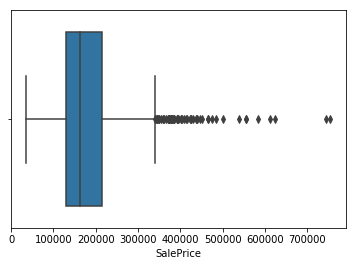

In [8]:
target = train['SalePrice'].copy()#通过使用copy函数幅值一个Series而不是Series的引用
sns.boxplot(target)
target.describe()


偏度: 1.882876
峰度: 6.536282


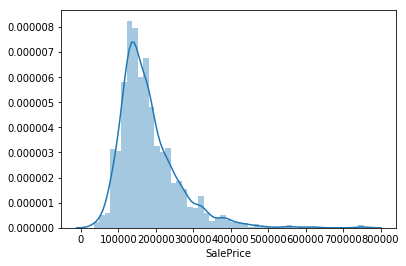

In [9]:
sns.distplot(target)
#skewness and kurtosis
print("偏度: %f" % target.skew())#表征概率分布密度曲线相对于平均值不对称程度的特征数。直观看来就是密度函数曲线尾部的相对长度
print("峰度: %f" % target.kurt())#正太分布峰度为3，此处具有过度的峰度

图表跟具体的数值对照可以得出大部分房屋分布在12~21w之间，而70w以上的房子看起来有点像异常值，留待后续进一步观察

其次
+ 偏离正态分布。
+ 有明显的正偏态。
+ 峰度较大。

**待补充峰度和偏度的意义**

In [10]:
train[train['SalePrice']>600000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


## 三、特征工程

在开始后续的特征探索工作之前，我们先**将训练数据集和测试数据集合并**。

In [11]:
data = pd.concat([train.drop('SalePrice',1),test])
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


通过Describe函数粗略的观察一下每一列的分布

下面我们通过之前填表时对特征的理解做一些处理

首先将一些分类的变量转换为数值变量

In [12]:
#可转化为数值型变量的特征，其中‘ExterQual','ExterCond','HeatingQC','Electrical','KitchenQual','Functional'不NaN表示没有相应的设备,
numcat = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence']
spnumcat=['ExterQual','ExterCond','HeatingQC','Electrical','KitchenQual','Functional']
print(data[numcat].isnull().sum())
print(data[spnumcat].isnull().sum())


BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
FireplaceQu     1420
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
PavedDrive         0
PoolQC          2909
Fence           2348
dtype: int64
ExterQual      0
ExterCond      0
HeatingQC      0
Electrical     1
KitchenQual    1
Functional     2
dtype: int64


In [13]:
catdata = data[numcat].fillna('None').copy()
class_arr = np.unique(catdata)
class_arr

array(['2Types', 'ALQ', 'Attchd', 'Av', 'BLQ', 'Basment', 'BuiltIn',
       'CarPort', 'Detchd', 'Ex', 'Fa', 'Fin', 'GLQ', 'Gd', 'GdPrv',
       'GdWo', 'LwQ', 'Mn', 'MnPrv', 'MnWw', 'N', 'No', 'None', 'P', 'Po',
       'RFn', 'Rec', 'TA', 'Unf', 'Y'], dtype=object)

In [14]:
class_num = (6,5,5,3,4,4,3,2,1,5,2,3,6,4,4,2,2,2,3,1,0,1,0,1,1,2,3,3,1,2)
class_mapping=pd.Series(class_num,class_arr)
class_mapping = class_mapping.to_dict()
#根据特征描述转化为连续的评级
class_mapping

{'2Types': 6,
 'ALQ': 5,
 'Attchd': 5,
 'Av': 3,
 'BLQ': 4,
 'Basment': 4,
 'BuiltIn': 3,
 'CarPort': 2,
 'Detchd': 1,
 'Ex': 5,
 'Fa': 2,
 'Fin': 3,
 'GLQ': 6,
 'Gd': 4,
 'GdPrv': 4,
 'GdWo': 2,
 'LwQ': 2,
 'Mn': 2,
 'MnPrv': 3,
 'MnWw': 1,
 'N': 0,
 'No': 1,
 'None': 0,
 'P': 1,
 'Po': 1,
 'RFn': 2,
 'Rec': 3,
 'TA': 3,
 'Unf': 1,
 'Y': 2}

In [15]:
catdata = catdata.replace(class_mapping)

In [16]:
catdata = pd.concat([catdata,data[spnumcat].copy()],1)
catdata = catdata.fillna('None')
class_arr1 = np.unique(catdata[spnumcat])
class_arr1

array(['Ex', 'Fa', 'FuseA', 'FuseF', 'FuseP', 'Gd', 'Maj1', 'Maj2', 'Min1',
       'Min2', 'Mix', 'Mod', 'None', 'Po', 'SBrkr', 'Sev', 'TA', 'Typ'], dtype=object)

In [17]:
#将None值标记为-1，留待后续处理
class_num1 = (5,1,3,2,1,4,3,2,6,5,0,4,-1,1,4,1,3,7)
class_mapping1 = pd.Series(class_num1,class_arr1)
class_mapping1 = class_mapping1.to_dict()
#根据特征描述转化为连续的评级
class_mapping1

{'Ex': 5,
 'Fa': 1,
 'FuseA': 3,
 'FuseF': 2,
 'FuseP': 1,
 'Gd': 4,
 'Maj1': 3,
 'Maj2': 2,
 'Min1': 6,
 'Min2': 5,
 'Mix': 0,
 'Mod': 4,
 'None': -1,
 'Po': 1,
 'SBrkr': 4,
 'Sev': 1,
 'TA': 3,
 'Typ': 7}

In [18]:
catdata = catdata.replace(class_mapping1)
#将标志为-1的值通过均值填充
catdata = catdata.replace(-1,catdata.mean())

In [19]:
catdata.isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PavedDrive      0
PoolQC          0
Fence           0
ExterQual       0
ExterCond       0
HeatingQC       0
Electrical      0
KitchenQual     0
Functional      0
dtype: int64

In [20]:
#待转化为哑变量的特征
dummyclass = ['MSZoning','Street','Alley','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','Condition2',
              'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating',
              'CentralAir','MiscFeature','SaleType','SaleCondition']
dummydata = data[dummyclass].copy()
#根据特征描述，大部分缺失值其实为没有该项，可作为一个单独类别处理，
dummydata= dummydata.fillna('none')
np.unique(dummydata).size

136

In [21]:
#将分类型变量转化为哑变量
dummydata =pd.get_dummies(dummydata)
dummydata.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_none,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_none,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
5,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [22]:
calccorr = pd.concat([dummydata[:1460],train['SalePrice']],1)
corr1 =calccorr .corr()

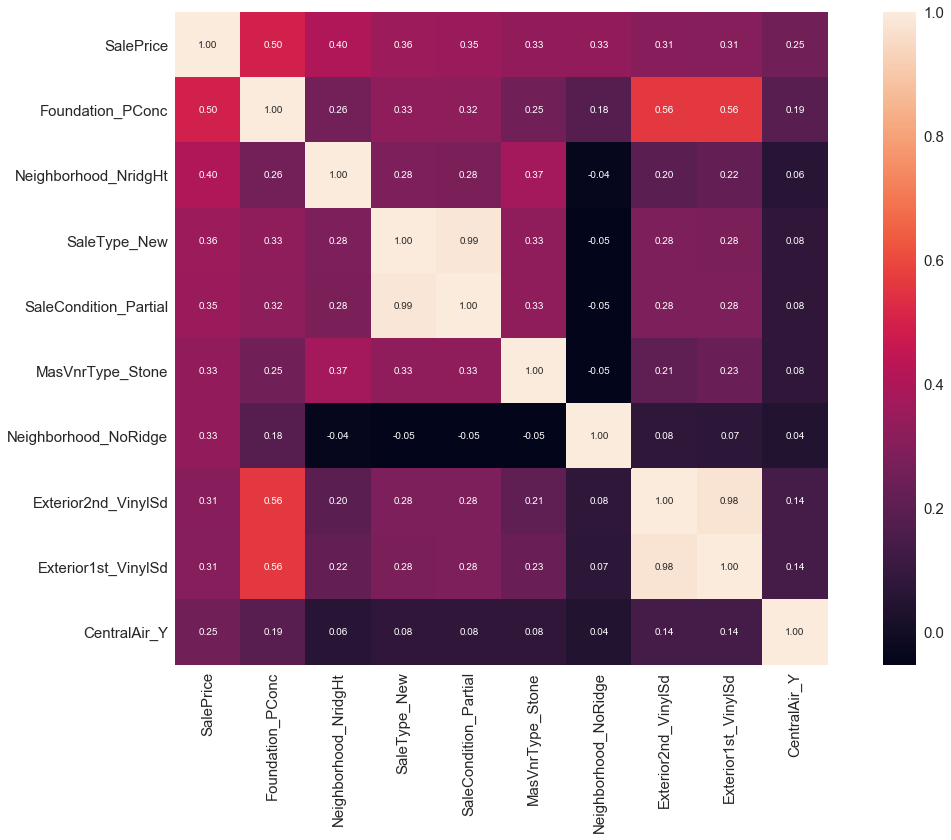

In [23]:
k = 10 # number of variables for heatmap
cols = corr1.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(calccorr[cols].values.T)
sns.set(font_scale=1.5)
hm = plt.subplots(figsize=(20, 12))#调整画布大小
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [24]:
numclass = ['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1'
            ,'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath',
            'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea',
            'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']
data[numclass].isnull().sum()
#numdata = data[numclass].fillna(data[numclass].mean()).copy()
numdata = data[numclass].fillna(0).copy()#比较两种特征处理方式那个比较好
numdata= numdata.drop('MSSubClass',1)
#将实际为分类变量的数值变量转化
dummydata = pd.concat([dummydata,pd.get_dummies(data['MSSubClass'].astype(str))],1)

In [25]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
unstddata = pd.concat([numdata,catdata],1)
stdnumdata = scaler.fit_transform(unstddata)
stdnumdata = pd.DataFrame(stdnumdata,index = unstddata.index,columns=unstddata.columns)
stdnumdata.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageCond,PavedDrive,PoolQC,Fence,ExterQual,ExterCond,HeatingQC,Electrical,KitchenQual,Functional
Id,,,,,,,,,,,,,,,,,,,,,
1,0.216075,-0.217879,0.646183,-0.507284,1.046258,0.896833,0.529034,0.581145,-0.293025,-0.934165,...,0.268343,0.31503,-0.056542,-0.477059,0.995543,-0.136524,0.845167,0.278367,0.701989,0.237489
2,0.664158,-0.072044,-0.063185,2.188279,0.154764,-0.395604,-0.567016,1.178255,-0.293025,-0.629284,...,0.268343,0.31503,-0.056542,-0.477059,-0.622491,-0.136524,0.845167,0.278367,-0.666349,0.237489
3,0.305692,0.137197,0.646183,-0.507284,0.980221,0.848965,0.338903,0.098189,-0.293025,-0.287999,...,0.268343,0.31503,-0.056542,-0.477059,0.995543,-0.136524,0.845167,0.278367,0.701989,0.237489
4,0.066714,-0.078385,0.646183,-0.507284,-1.859351,-0.682812,-0.567016,-0.494529,-0.293025,-0.046824,...,0.268343,0.31503,-0.056542,-0.477059,-0.622491,-0.136524,-0.115519,0.278367,0.701989,0.237489
5,0.783647,0.518903,1.355551,-0.507284,0.947203,0.753229,1.390216,0.469187,-0.293025,-0.160586,...,0.268343,0.31503,-0.056542,-0.477059,0.995543,-0.136524,0.845167,0.278367,0.701989,0.237489


In [26]:
cleandata = pd.concat([stdnumdata,dummydata],1)
cleandata.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,30,40,45,50,60,70,75,80,85,90
Id,,,,,,,,,,,,,,,,,,,,,
1,0.216075,-0.217879,0.646183,-0.507284,1.046258,0.896833,0.529034,0.581145,-0.293025,-0.934165,...,0,0,0,0,1,0,0,0,0,0
2,0.664158,-0.072044,-0.063185,2.188279,0.154764,-0.395604,-0.567016,1.178255,-0.293025,-0.629284,...,0,0,0,0,0,0,0,0,0,0
3,0.305692,0.137197,0.646183,-0.507284,0.980221,0.848965,0.338903,0.098189,-0.293025,-0.287999,...,0,0,0,0,1,0,0,0,0,0
4,0.066714,-0.078385,0.646183,-0.507284,-1.859351,-0.682812,-0.567016,-0.494529,-0.293025,-0.046824,...,0,0,0,0,0,1,0,0,0,0
5,0.783647,0.518903,1.355551,-0.507284,0.947203,0.753229,1.390216,0.469187,-0.293025,-0.160586,...,0,0,0,0,1,0,0,0,0,0


## 四、模型选择

In [27]:
X_scaled = cleandata[:1460]
test_X_scaled = cleandata[1460:]
y_log = np.log(train.SalePrice)

In [38]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import skew
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import Imputer

In [28]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor

# define cross validation strategy
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

In [30]:
models = [Ridge(),Lasso(alpha=0.01,max_iter=10000),RandomForestRegressor(),GradientBoostingRegressor(),SVR(),LinearSVR(),
          ElasticNet(alpha=0.001,max_iter=10000),SGDRegressor(max_iter=1000,tol=1e-3),BayesianRidge(),KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),
          ExtraTreesRegressor(),XGBRegressor()]

names = ["Ridge", "Lasso", "RF", "GBR", "SVR", "LinSVR", "Ela","SGD","Bay","Ker","Extra","Xgb"]
for name, model in zip(names, models):
    score = rmse_cv(model, X_scaled, y_log)
    print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))

Ridge: 0.140947, 0.0237
Lasso: 0.152151, 0.0226
RF: 0.151031, 0.0128
GBR: 0.124995, 0.0096
SVR: 0.129724, 0.0155
LinSVR: 0.159920, 0.0305
Ela: 0.133330, 0.0256
SGD: 0.317412, 0.0232
Bay: 0.136870, 0.0232
Ker: 0.121914, 0.0145
Extra: 0.143535, 0.0106
Xgb: 0.130164, 0.0088


In [31]:
class grid():
    def __init__(self,model):
        self.model = model
    
    def grid_get(self,X,y,param_grid):
        grid_search = GridSearchCV(self.model,param_grid,cv=5, scoring="neg_mean_squared_error")
        grid_search.fit(X,y)
        print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))
        grid_search.cv_results_['mean_test_score'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])
        print(pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score']])

In [32]:
grid(Lasso()).grid_get(X_scaled,y_log,{'alpha': [0.0004,0.0005,0.0007,0.0009],'max_iter':[10000]})

{'alpha': 0.0005, 'max_iter': 10000} 0.135797572287
                                 params  mean_test_score  std_test_score
0  {'alpha': 0.0004, 'max_iter': 10000}         0.136213        0.007762
1  {'alpha': 0.0005, 'max_iter': 10000}         0.135798        0.007785
2  {'alpha': 0.0007, 'max_iter': 10000}         0.135984        0.007812
3  {'alpha': 0.0009, 'max_iter': 10000}         0.137026        0.007724


C:\Users\MappingLab-lxy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\MappingLab-lxy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\MappingLab-lxy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\MappingLab-lxy\Anacon

In [33]:
grid(Ridge()).grid_get(X_scaled,y_log,{'alpha':[35,40,45,50,55,60,65,70,80,90]})

{'alpha': 35} 0.139302605163
          params  mean_test_score  std_test_score
0  {'alpha': 35}         0.139303        0.007000
1  {'alpha': 40}         0.139481        0.007021
2  {'alpha': 45}         0.139658        0.007037
3  {'alpha': 50}         0.139831        0.007051
4  {'alpha': 55}         0.139999        0.007062
5  {'alpha': 60}         0.140164        0.007070
6  {'alpha': 65}         0.140323        0.007076
7  {'alpha': 70}         0.140478        0.007081
8  {'alpha': 80}         0.140775        0.007085
9  {'alpha': 90}         0.141055        0.007085


C:\Users\MappingLab-lxy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\MappingLab-lxy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\MappingLab-lxy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\MappingLab-lxy\Anacon

In [34]:
grid(SVR()).grid_get(X_scaled,y_log,{'C':[11,13,15],'kernel':["rbf"],"gamma":[0.0003,0.0004],"epsilon":[0.008,0.009]})

{'C': 15, 'epsilon': 0.009, 'gamma': 0.0004, 'kernel': 'rbf'} 0.125833650424
                                               params  mean_test_score  \
0   {'C': 11, 'epsilon': 0.008, 'gamma': 0.0003, '...         0.129816   
1   {'C': 11, 'epsilon': 0.008, 'gamma': 0.0004, '...         0.126773   
2   {'C': 11, 'epsilon': 0.009, 'gamma': 0.0003, '...         0.129749   
3   {'C': 11, 'epsilon': 0.009, 'gamma': 0.0004, '...         0.126786   
4   {'C': 13, 'epsilon': 0.008, 'gamma': 0.0003, '...         0.129138   
5   {'C': 13, 'epsilon': 0.008, 'gamma': 0.0004, '...         0.126267   
6   {'C': 13, 'epsilon': 0.009, 'gamma': 0.0003, '...         0.129050   
7   {'C': 13, 'epsilon': 0.009, 'gamma': 0.0004, '...         0.126221   
8   {'C': 15, 'epsilon': 0.008, 'gamma': 0.0003, '...         0.128635   
9   {'C': 15, 'epsilon': 0.008, 'gamma': 0.0004, '...         0.125835   
10  {'C': 15, 'epsilon': 0.009, 'gamma': 0.0003, '...         0.128555   
11  {'C': 15, 'epsilon': 0.009, 'ga

C:\Users\MappingLab-lxy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\MappingLab-lxy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\MappingLab-lxy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\MappingLab-lxy\Anacon

In [35]:
param_grid={'alpha':[0.2,0.3,0.4], 'kernel':["polynomial"], 'degree':[3],'coef0':[0.8,1]}
grid(KernelRidge()).grid_get(X_scaled,y_log,param_grid)

{'alpha': 0.2, 'coef0': 1, 'degree': 3, 'kernel': 'polynomial'} 0.125032346283
                                              params  mean_test_score  \
0  {'alpha': 0.2, 'coef0': 0.8, 'degree': 3, 'ker...         0.129215   
1  {'alpha': 0.2, 'coef0': 1, 'degree': 3, 'kerne...         0.125032   
2  {'alpha': 0.3, 'coef0': 0.8, 'degree': 3, 'ker...         0.130906   
3  {'alpha': 0.3, 'coef0': 1, 'degree': 3, 'kerne...         0.125093   
4  {'alpha': 0.4, 'coef0': 0.8, 'degree': 3, 'ker...         0.132945   
5  {'alpha': 0.4, 'coef0': 1, 'degree': 3, 'kerne...         0.125677   

   std_test_score  
0        0.004460  
1        0.004148  
2        0.004404  
3        0.004112  
4        0.004354  
5        0.004071  


C:\Users\MappingLab-lxy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\MappingLab-lxy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\MappingLab-lxy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\MappingLab-lxy\Anacon

In [36]:
grid(ElasticNet()).grid_get(X_scaled,y_log,{'alpha':[0.0008,0.004,0.005],'l1_ratio':[0.08,0.1,0.3],'max_iter':[10000]})

{'alpha': 0.0008, 'l1_ratio': 0.3, 'max_iter': 10000} 0.136137007493
                                              params  mean_test_score  \
0  {'alpha': 0.0008, 'l1_ratio': 0.08, 'max_iter'...         0.140276   
1  {'alpha': 0.0008, 'l1_ratio': 0.1, 'max_iter':...         0.139645   
2  {'alpha': 0.0008, 'l1_ratio': 0.3, 'max_iter':...         0.136137   
3  {'alpha': 0.004, 'l1_ratio': 0.08, 'max_iter':...         0.136885   
4  {'alpha': 0.004, 'l1_ratio': 0.1, 'max_iter': ...         0.136967   
5  {'alpha': 0.004, 'l1_ratio': 0.3, 'max_iter': ...         0.139879   
6  {'alpha': 0.005, 'l1_ratio': 0.08, 'max_iter':...         0.137217   
7  {'alpha': 0.005, 'l1_ratio': 0.1, 'max_iter': ...         0.137393   
8  {'alpha': 0.005, 'l1_ratio': 0.3, 'max_iter': ...         0.141512   

   std_test_score  
0        0.007120  
1        0.007149  
2        0.007189  
3        0.006929  
4        0.006980  
5        0.007391  
6        0.006978  
7        0.007026  
8        0.007451  


C:\Users\MappingLab-lxy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\MappingLab-lxy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\MappingLab-lxy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\MappingLab-lxy\Anacon

In [39]:
class AverageWeight(BaseEstimator, RegressorMixin):
    def __init__(self,mod,weight):
        self.mod = mod
        self.weight = weight
        
    def fit(self,X,y):
        self.models_ = [clone(x) for x in self.mod]
        for model in self.models_:
            model.fit(X,y)
        return self
    
    def predict(self,X):
        w = list()
        pred = np.array([model.predict(X) for model in self.models_])
        # for every data point, single model prediction times weight, then add them together
        for data in range(pred.shape[1]):
            single = [pred[model,data]*weight for model,weight in zip(range(pred.shape[0]),self.weight)]
            w.append(np.sum(single))
        return w

lasso = Lasso(alpha=0.0005,max_iter=10000)
ridge = Ridge(alpha=60)
svr = SVR(gamma= 0.0004,kernel='rbf',C=13,epsilon=0.009)
ker = KernelRidge(alpha=0.2 ,kernel='polynomial',degree=3 , coef0=0.8)
ela = ElasticNet(alpha=0.005,l1_ratio=0.08,max_iter=10000)
bay = BayesianRidge()

# assign weights based on their gridsearch score
w1 = 0.02
w2 = 0.2
w3 = 0.25
w4 = 0.3
w5 = 0.03
w6 = 0.2

weight_avg = AverageWeight(mod = [lasso,ridge,svr,ker,ela,bay],weight=[w1,w2,w3,w4,w5,w6])

score = rmse_cv(weight_avg,X_scaled,y_log)
print(score.mean())

0.123200575704


In [40]:
class stacking(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self,mod,meta_model):
        self.mod = mod
        self.meta_model = meta_model
        self.kf = KFold(n_splits=5, random_state=42, shuffle=True)
        
    def fit(self,X,y):
        self.saved_model = [list() for i in self.mod]
        oof_train = np.zeros((X.shape[0], len(self.mod)))
        
        for i,model in enumerate(self.mod):
            for train_index, val_index in self.kf.split(X,y):
                renew_model = clone(model)
                renew_model.fit(X[train_index], y[train_index])
                self.saved_model[i].append(renew_model)
                oof_train[val_index,i] = renew_model.predict(X[val_index])
        
        self.meta_model.fit(oof_train,y)
        return self
    
    def predict(self,X):
        whole_test = np.column_stack([np.column_stack(model.predict(X) for model in single_model).mean(axis=1) 
                                      for single_model in self.saved_model]) 
        return self.meta_model.predict(whole_test)
    
    def get_oof(self,X,y,test_X):
        oof = np.zeros((X.shape[0],len(self.mod)))
        test_single = np.zeros((test_X.shape[0],5))
        test_mean = np.zeros((test_X.shape[0],len(self.mod)))
        for i,model in enumerate(self.mod):
            for j, (train_index,val_index) in enumerate(self.kf.split(X,y)):
                clone_model = clone(model)
                clone_model.fit(X[train_index],y[train_index])
                oof[val_index,i] = clone_model.predict(X[val_index])
                test_single[:,j] = clone_model.predict(test_X)
            test_mean[:,i] = test_single.mean(axis=1)
        return oof, test_mean

In [41]:
# must do imputer first, otherwise stacking won't work, and i don't know why.
a = Imputer().fit_transform(X_scaled)
b = Imputer().fit_transform(y_log.values.reshape(-1,1)).ravel()

stack_model = stacking(mod=[lasso,ridge,svr,ker,ela,bay],meta_model=ker)

score = rmse_cv(stack_model,a,b)
print(score.mean())

0.125125149454


### 5. Predict and submit test results

In [42]:
# This is the final model I use
stack_model = stacking(mod=[lasso,ridge,svr,ker,ela,bay],meta_model=ker)

stack_model.fit(a,b)

stacking(meta_model=KernelRidge(alpha=0.2, coef0=0.8, degree=3, gamma=None, kernel='polynomial',
      kernel_params=None),
     mod=[Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False), Ridge(alpha=60, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=No...True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)])

In [44]:
pred = np.exp(stack_model.predict(test_X_scaled))

result=pd.DataFrame({'Id':test.index, 'SalePrice':pred})
result.to_csv("0114submission.csv",index=False)